In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = np.random.randint(0, 256, (3, 3, 3), dtype=np.uint8)
print("Original 3D Image Array:\n", image)

Original 3D Image Array:
 [[[ 42 136 150]
  [ 27  16  55]
  [ 81 165 118]]

 [[ 21 246  48]
  [228  47 254]
  [224 172  59]]

 [[214 209  10]
  [ 52  70 234]
  [ 80 167 248]]]


In [3]:
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

In [4]:
print("\nRed Channel:\n", red_channel)
print("\nGreen Channel:\n", green_channel)
print("\nBlue Channel:\n", blue_channel)


Red Channel:
 [[ 42  27  81]
 [ 21 228 224]
 [214  52  80]]

Green Channel:
 [[136  16 165]
 [246  47 172]
 [209  70 167]]

Blue Channel:
 [[150  55 118]
 [ 48 254  59]
 [ 10 234 248]]


In [5]:
avg_red = np.mean(red_channel)
avg_green = np.mean(green_channel)
avg_blue = np.mean(blue_channel)

In [6]:
print("\nAverage Intensities:")
print(f"Red: {avg_red:.2f}, Green: {avg_green:.2f}, Blue: {avg_blue:.2f}")



Average Intensities:
Red: 107.67, Green: 136.44, Blue: 130.67


In [7]:
brightened_image = np.clip(image + 50, 0, 255).astype(np.uint8)
print("\nBrightened Image Array:\n", brightened_image)


Brightened Image Array:
 [[[ 92 186 200]
  [ 77  66 105]
  [131 215 168]]

 [[ 71  40  98]
  [ 22  97  48]
  [ 18 222 109]]

 [[  8   3  60]
  [102 120  28]
  [130 217  42]]]


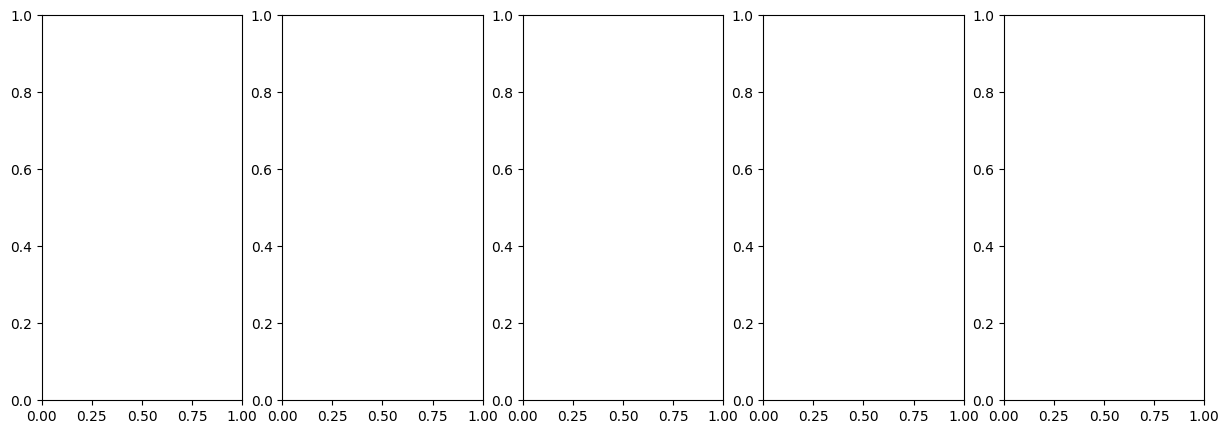

In [8]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))


In [9]:
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

(np.float64(-0.5), np.float64(2.5), np.float64(2.5), np.float64(-0.5))

In [10]:
axes[1].imshow(red_channel, cmap="Reds")
axes[1].set_title("Red Channel")
axes[1].axis("off")

(np.float64(-0.5), np.float64(2.5), np.float64(2.5), np.float64(-0.5))

In [11]:
axes[2].imshow(green_channel, cmap="Greens")
axes[2].set_title("Green Channel")
axes[2].axis("off")


(np.float64(-0.5), np.float64(2.5), np.float64(2.5), np.float64(-0.5))

In [12]:
axes[3].imshow(blue_channel, cmap="Blues")
axes[3].set_title("Blue Channel")
axes[3].axis("off")

(np.float64(-0.5), np.float64(2.5), np.float64(2.5), np.float64(-0.5))

In [13]:
axes[4].imshow(brightened_image)
axes[4].set_title("Brightened Image")
axes[4].axis("off")


(np.float64(-0.5), np.float64(2.5), np.float64(2.5), np.float64(-0.5))

In [14]:
plt.show()

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json


In [16]:
rng = np.random.default_rng(42)
scores = rng.integers(low=50, high=101, size=(4, 4))



In [17]:
row_means = scores.mean(axis=1)
col_means = scores.mean(axis=0)



In [18]:
global_mean = scores.mean()
global_std = scores.std()       # population std (ddof=0)
global_var = scores.var()


In [19]:
row_std = scores.std(axis=1)
col_std = scores.std(axis=0)



In [20]:
row_var = scores.var(axis=1)
col_var = scores.var(axis=0)


In [21]:
global_max = scores.max()
global_min = scores.min()



In [22]:
max_flat_index = scores.argmax()
min_flat_index = scores.argmin()
max_rc = np.unravel_index(max_flat_index, scores.shape)  # (row, col)
min_rc = np.unravel_index(min_flat_index, scores.shape)



In [23]:
df = pd.DataFrame(scores, columns=[f"Test{j+1}" for j in range(scores.shape[1])])
df["Row Mean"] = row_means.round(2)


In [24]:
col_means_series = pd.Series(list(col_means) + [np.nan], index=df.columns, name="Col Mean").round(2)
df_with_col_means = pd.concat([df, pd.DataFrame([col_means_series])], ignore_index=True)


In [25]:
print("=== 4x4 Test Scores Statistical Summary ===")
print("Scores Array:\n", scores)
print("\nRow-wise Means:", np.round(row_means, 2))
print("Column-wise Means:", np.round(col_means, 2))
print("\nGlobal Mean:", round(global_mean, 2))
print("Global Std:", round(global_std, 2))
print("Global Var:", round(global_var, 2))
print("\nRow-wise Std:", np.round(row_std, 2))
print("Column-wise Std:", np.round(col_std, 2))
print("Row-wise Var:", np.round(row_var, 2))
print("Column-wise Var:", np.round(col_var, 2))
print("\nGlobal Max:", global_max, "at index (row, col) =", max_rc)
print("Global Min:", global_min, "at index (row, col) =", min_rc)



=== 4x4 Test Scores Statistical Summary ===
Scores Array:
 [[54 89 83 72]
 [72 93 54 85]
 [60 54 76 99]
 [87 88 86 90]]

Row-wise Means: [74.5  76.   72.25 87.75]
Column-wise Means: [68.25 81.   74.75 86.5 ]

Global Mean: 77.62
Global Std: 14.53
Global Var: 210.98

Row-wise Std: [13.31 14.75 17.41  1.48]
Column-wise Std: [12.62 15.7  12.52  9.76]
Row-wise Var: [177.25 217.5  303.19   2.19]
Column-wise Var: [159.19 246.5  156.69  95.25]

Global Max: 99 at index (row, col) = (np.int64(2), np.int64(3))
Global Min: 54 at index (row, col) = (np.int64(0), np.int64(0))


In [26]:
df_with_col_means.to_csv("test_scores_4x4.csv", index=False)


In [27]:
report_lines = []
report_lines.append("=== 4x4 Test Scores Statistical Summary ===")
report_lines.append(f"Scores Array:\n{scores}")
report_lines.append("")
report_lines.append(f"Row-wise Means: {np.round(row_means, 2)}")
report_lines.append(f"Column-wise Means: {np.round(col_means, 2)}")
report_lines.append("")
report_lines.append(f"Global Mean: {global_mean:.2f}")
report_lines.append(f"Global Std (ddof=0): {global_std:.2f}")
report_lines.append(f"Global Var (ddof=0): {global_var:.2f}")
report_lines.append("")
report_lines.append(f"Row-wise Std: {np.round(row_std, 2)}")
report_lines.append(f"Column-wise Std: {np.round(col_std, 2)}")
report_lines.append(f"Row-wise Var: {np.round(row_var, 2)}")
report_lines.append(f"Column-wise Var: {np.round(col_var, 2)}")
report_lines.append("")
report_lines.append(f"Global Max: {global_max} at index (row, col) = {max_rc}")
report_lines.append(f"Global Min: {global_min} at index (row, col) = {min_rc}")

with open("test_scores_summary.txt", "w") as f:
    f.write("\n".join(report_lines))



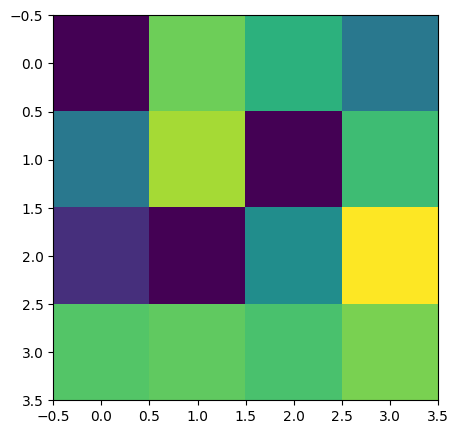

In [28]:
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(scores)


In [29]:
for i in range(scores.shape[0]):
    for j in range(scores.shape[1]):
        ax.text(j, i, str(scores[i, j]), ha="center", va="center")



In [30]:
ax.scatter([max_rc[1]], [max_rc[0]], marker="o", s=120, facecolors="none", edgecolors="black", linewidths=2)
ax.scatter([min_rc[1]], [min_rc[0]], marker="s", s=120, facecolors="none", edgecolors="black", linewidths=2)



In [31]:
ax.set_xticks(range(scores.shape[1]))
ax.set_yticks(range(scores.shape[0]))
ax.set_xticklabels([f"Test{j+1}" for j in range(scores.shape[1])])
ax.set_yticklabels([f"Stu{i+1}" for i in range(scores.shape[0])])
ax.set_title("4x4 Test Scores Heatmap (circle=max, square=min)")
plt.tight_layout()
plt.savefig("test_scores_heatmap.png", dpi=200)
plt.show()


<Figure size 640x480 with 0 Axes>

In [34]:
metrics = {
    "scores": scores.tolist(),
    "row_means": np.round(row_means, 2).tolist(),
    "col_means": np.round(col_means, 2).tolist(),
    "global": {"mean": float(global_mean), "std": float(global_std), "var": float(global_var)},
    "global_max": {"value": int(global_max), "index": (int(max_rc[0]), int(max_rc[1]))},
    "global_min": {"value": int(global_min), "index": (int(min_rc[0]), int(min_rc[1]))},
}
with open("test_scores_metrics.json", "w") as jf:
    json.dump(metrics, jf, indent=2)